#### Paper data and plots

This notebook plots the data presented in the paper 'Compare the Pair: Rotated vs. Unrotated Surface Codes at Equal Logical Error Rates' by importing the already-collected data and plotting it. For an example of how to generate this data before plotting it see 'example.ipynb'.

##### Requirements

In [70]:
# pip install stim      # Stim: a stabiliser circuit simulator

In [71]:
# pip install sinter==1.13.0     # Sinter: for bulk sampling of stim circuits

In [72]:
import sinter
import stim

import os
import sys
import pickle

sys.path.insert(0, 'functions') 
import morefuncs as morefuncs
import com_funcs5 as funcs

# Update with any changes to these files:
from importlib import reload
reload(morefuncs)
reload(funcs);

In [73]:
# # Pickling CXSI csv.stats
# mylist = sinter.stats_from_csv_files("collected_stats/x_CXSI.csv", "collected_stats/z_CXSI.csv")
# path = "pickled_stats/CXSI_stats.pickle"
# with open(path, "wb") as file:
#     pickle.dump(mylist,file)

##### Import the collected data:

In [74]:
noise_model = 'CXSI' # choices are SD and CXSI

with open(f'pickled_stats/{noise_model}_stats.pickle', 'rb') as file:
        mylist = pickle.load(file)    

In [75]:
# # bin the CNOT orders to decide which ones to plot:
roorders, unroorders = funcs.bin_CNOT_orders(mylist) # print out CNOT orders 

Rotated code CNOT orders:
32013021

Unrotated code CNOT orders:
10231203


##### Threshold plots: $p_L$ vs. $p$

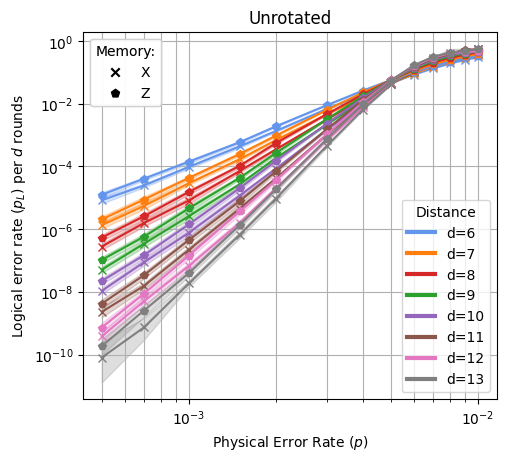

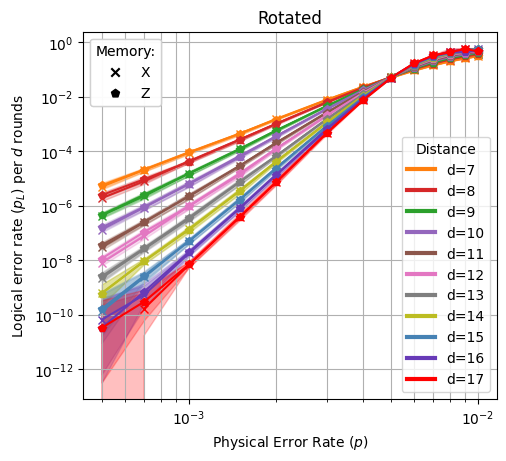

In [76]:
reload(funcs)

roorder = roorders[0] 
unroorder = 10231203 

funcs.plot_thresholds(mylist, roorder, unroorder, romind = 7, unromind = 6, romaxd = 17, unromaxd = 13, minp = 0.0001)

##### Fit to scaling function $p_L = \alpha ( p / \beta)^{\gamma d + \delta}$

<IPython.core.display.Math object>


distances = combined

unro z 10231203

    α = 0.059 ± 0.010
    β = 0.00500 ± 0.00002
    γ = 0.702 ± 0.014
    δ = 0.48 ± 0.14


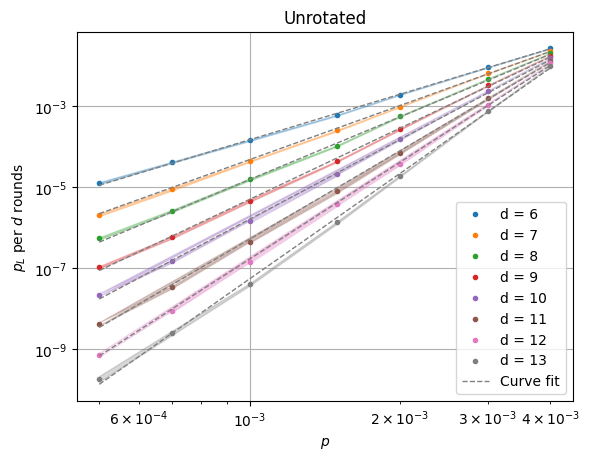


ro z 32013021

    α = 0.056 ± 0.009
    β = 0.00495 ± 0.00006
    γ = 0.582 ± 0.026
    δ = 0.16 ± 0.33


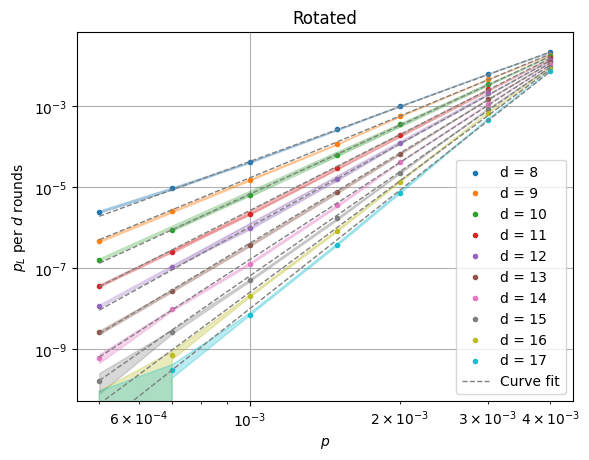

In [77]:
reload(funcs)

distances = 'combined' # choices are 'odd', 'even' or 'combined'
b = 'z' # choices are x or z. Memory z is worst-case for unrotated codes with inner CNOTs 0 and 2, e.g. unroorder 12031023.

funcs.fit_scaling_and_plot(mylist, distances, b, roorder, unroorder, minp = 0.0005, maxp = 0.004, romind = 8, unromind = 6)

##### Plot as $p_L$ vs. $\sqrt{n}$

[0.0005, 0.0007, 0.001, 0.0015, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]


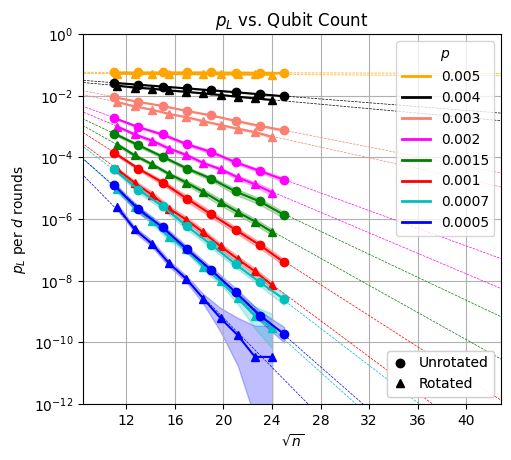

In [78]:
reload(funcs)

b = 'z' 

# give pvalues that have been simulated for for these orders:
pvalues = funcs.give_p_values(mylist, roorder, unroorder)
print(pvalues)

funcs.plot_pL_vs_qubit_count(mylist, b, roorder, unroorder, ps = pvalues[0:8], romind = 8, unromind = 6)

##### Plot 'teraquop' count :$\ $ the number of qubits required to reach $p_L = 10^{-12}$

<IPython.core.display.Math object>

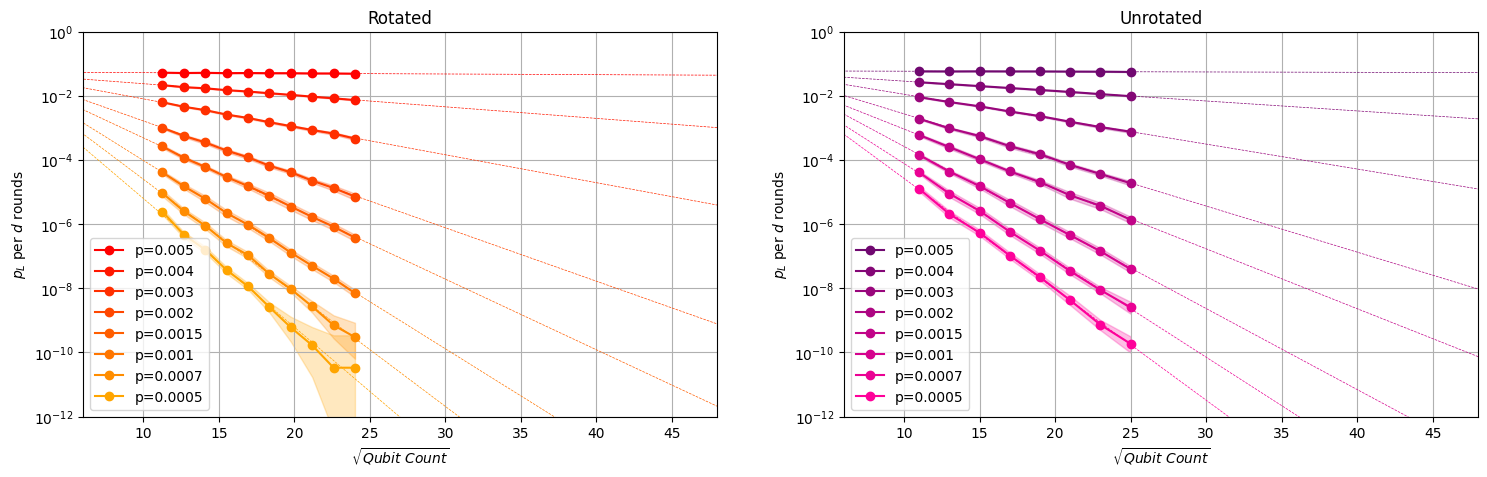

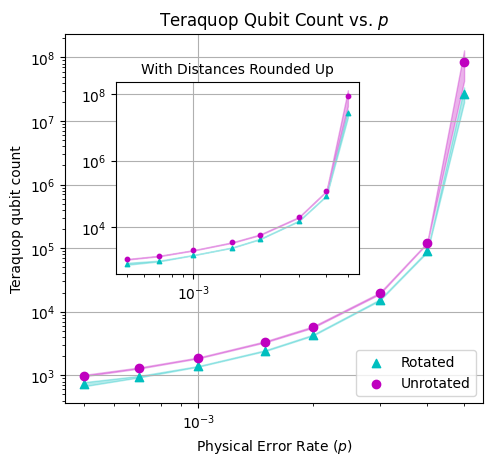

In [79]:
reload(funcs)

b = 'z' 

funcs.plot_teraquop(mylist, b, roorder, unroorder, ps = pvalues[0:8], teraquop_inset = True, romind = 8, unromind = 6, optional_plot = True)  # make sure selection of pvalues is below / very close to threshold

##### Plot ratios of qubit counts vs. $p_L$

This is the projected number of qubits used by the rotated surface code divided by the number of qubits used by the unrotated surface code to achieve the same $p_L$

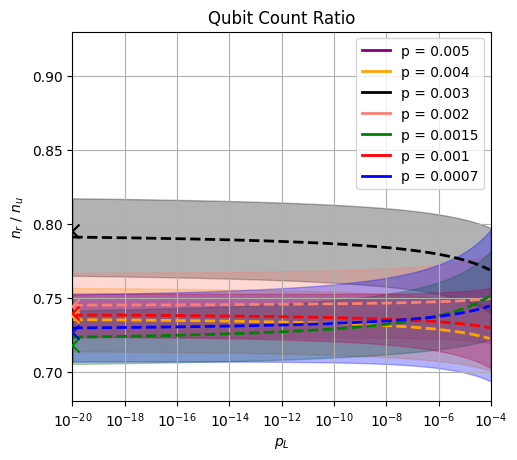

In [80]:
reload(funcs)

b = 'z' #

funcs.plot_ratio(mylist, b, roorder, unroorder, romind = 8, unromind = 6, ps = pvalues[1:8], paper_ylims = True)

##### Memory time vs. $\sqrt{n}$

This is a reformulation of the $p_L$ vs. $\sqrt{n}$ plots above, converting the $p_L$ per $d$ rounds to be the length of time (assuming one stabiliser measurement cycle take a microsecond) before $p_L$ over the entire shot of the memory experiment equals $p$.

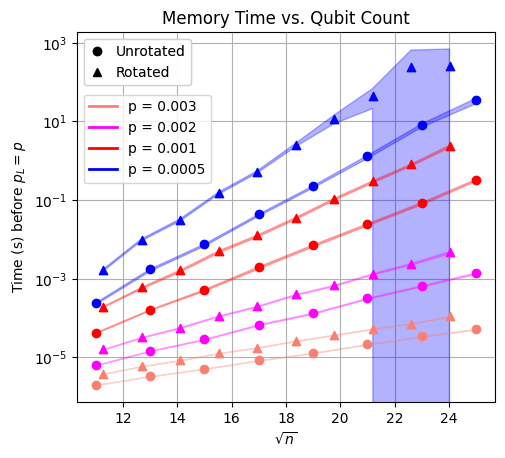

In [81]:
reload(funcs)

b = 'z'

funcs.plot_memory_times(mylist, b, roorder, unroorder, ps = [0.0005, 0.001, 0.002, 0.003], romind = 8, unromind = 6)